# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rucirasatti Nariswana
- **Email:** rcirasatti@gmail.com / mc338d5x2308@student.devacademy.id
- **ID Dicoding:** rcirasatti

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda harian berdasarkan hari dalam seminggu di tahun 2012?
- Musim mana penggunaan sepeda tertinggi pada tahun 2011-2012?
- Bagaimana pola penggunaan sepeda per jam di musim tertinggi 2012?

## Import Semua Packages/Library yang Digunakan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

#### Membaca dataset day.csv

In [38]:
# Membaca kedua dataset
day_df = pd.read_csv('data/day.csv')

# Tampilkan 5 baris pertama
print("5 Baris Pertama day.csv:")
day_df.head()

5 Baris Pertama day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membaca dataset hour.csv

In [39]:
# Membaca kedua dataset
hour_df = pd.read_csv('data/hour.csv')

# Tampilkan 5 baris pertama
print("\n5 Baris Pertama hour.csv:")
hour_df.head()


5 Baris Pertama hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data harian (day.csv) dan per jam (hour.csv) berhasil dimuat untuk analisis lebih lanjut.
- Dataset berisi informasi tentang peminjaman sepeda, termasuk tanggal, musim, cuaca, suhu, dan jumlah pengguna.

### Assessing Data

#### Menilai Data day_df

In [40]:
print("Informasi day.csv:")
day_df.info()

Informasi day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
# Missing value
print("\nMissing Value di day.csv:")
day_df.isna().sum()


Missing Value di day.csv:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
# Duplikat
print("\nJumlah Duplikat di day.csv:", day_df.duplicated().sum())


Jumlah Duplikat di day.csv: 0


In [43]:
# Statistik deskriptif
print("\nStatistik Deskriptif day.csv:")
day_df.describe()


Statistik Deskriptif day.csv:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [44]:
# Info dataset
print("\nInformasi hour.csv:")
hour_df.info()


Informasi hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
# Missing value
print("\nMissing Value di hour.csv:")
hour_df.isna().sum()


Missing Value di hour.csv:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [46]:
# Duplikat
print("Jumlah Duplikat di hour.csv:", hour_df.duplicated().sum())

Jumlah Duplikat di hour.csv: 0


In [47]:
# Statistik deskriptif
print("\nStatistik Deskriptif hour.csv:")
hour_df.describe()


Statistik Deskriptif hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Berikut adalah hasil penilaian data dari kedua dataset:

| Dataframe | Tipe Data                                      | Missing Value | Duplicate Data | Inaccurate Value                     |
|-----------|------------------------------------------------|---------------|----------------|--------------------------------------|
| day.csv   | int64 (11 kolom), float64 (4 kolom), object (1 kolom: dteday) | Tidak ada (0 di semua kolom) | 0 baris        | Tidak ada (nilai seperti temp, hum, cnt sesuai deskripsi) |
| hour.csv  | int64 (12 kolom), float64 (4 kolom), object (1 kolom: dteday) | Tidak ada (0 di semua kolom) | 0 baris        | Tidak ada (nilai sesuai deskripsi, hr 0-23 valid)         |

**Keterangan:**
- **Tipe Data:** `dteday` di kedua dataset adalah object (string), perlu diubah ke datetime. Lainnya sesuai (numerik).
- **Missing Value:** Tidak ada nilai hilang di kedua dataset.
- **Duplicate Data:** Tidak ada duplikat di kedua dataset.
- **Inaccurate Value:** Tidak ditemukan nilai yang tidak sesuai (misalnya, `temp`, `hum`, `windspeed` dalam rentang normalisasi, `hr` di hour.csv dari 0-23).

### Cleaning Data

In [48]:
# Ubah dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [49]:
# Gabungkan dataset (hour.csv sebagai basis)
combined_df = pd.merge(hour_df, day_df[['dteday', 'season', 'weekday', 'workingday', 'weathersit']],
                       on='dteday', how='left', suffixes=('_hour', '_day'))


In [50]:
# Verifikasi setelah pembersihan
print("Informasi combined_df setelah Cleaning:")
combined_df.info()

Informasi combined_df setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr               17379 non-null  int64         
 4   mnth             17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday          17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp             17379 non-null  float64       
 11  atemp            17379 non-null  float64       
 12  hum              17379 non-null  float64       
 13  windspeed        17379 non-null  float64       
 14

In [51]:
print("\nMissing Value di combined_df:")
combined_df.isna().sum()


Missing Value di combined_df:


instant            0
dteday             0
season_hour        0
yr                 0
mnth               0
hr                 0
holiday            0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
cnt                0
season_day         0
weekday_day        0
workingday_day     0
weathersit_day     0
dtype: int64

**Insight:**
- `dteday` diubah ke datetime untuk memudahkan analisis waktu.
- Dataset digabungkan dengan `hour.csv` sebagai basis, menambahkan fitur harian (`season`, `weekday`, `workingday`, `weathersit`).
- Tidak ada missing value setelah penggabungan.


## Exploratory Data Analysis (EDA)

### Tren penggunaan berdasarkan hari dalam seminggu (2012)

In [52]:
weekday_usage_2012 = combined_df[combined_df['yr'] == 1].groupby('weekday_day')['cnt'].mean()
print("Rata-rata Penggunaan per Hari dalam Seminggu (2012):")
print(weekday_usage_2012)

Rata-rata Penggunaan per Hari dalam Seminggu (2012):
weekday_day
0    210.033832
1    221.287781
2    234.582453
3    243.883628
4    249.472713
5    245.019231
6    238.833333
Name: cnt, dtype: float64


### Casual vs Registered Pengguna

In [53]:
user_type = combined_df[['casual', 'registered']].mean()
print("\nRata-rata Pengguna Casual vs Registered:")
print(user_type)


Rata-rata Pengguna Casual vs Registered:
casual         35.676218
registered    153.786869
dtype: float64


### Pengaruh cuaca di 2012

In [54]:
weather_usage_2012 = combined_df[combined_df['yr'] == 1].groupby('weathersit_day')['cnt'].mean()
print("\nRata-rata Penggunaan per Kondisi Cuaca (2012):")
print(weather_usage_2012)


Rata-rata Penggunaan per Kondisi Cuaca (2012):
weathersit_day
1    250.596161
2    209.176831
3    105.429752
Name: cnt, dtype: float64


### Total penggunaan per musim (2011-2012)

In [55]:
season_total = combined_df.groupby('season_day')['cnt'].sum()
print("\nTotal Penggunaan per Musim (2011-2012):")
print(season_total)


Total Penggunaan per Musim (2011-2012):
season_day
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


### Pola penggunaan per jam di musim tersibuk 2012

In [56]:
fall_2012_hour = combined_df[(combined_df['season_day'] == 3) & (combined_df['yr'] == 1)].groupby('hr')['cnt'].mean()
print("\nRata-rata Penggunaan per Jam di Musim Fall 2012:")
print(fall_2012_hour)


Rata-rata Penggunaan per Jam di Musim Fall 2012:
hr
0      86.627660
1      50.851064
2      35.212766
3      17.329787
4       9.702128
5      32.638298
6     121.138298
7     334.106383
8     517.361702
9     314.340426
10    265.042553
11    307.585106
12    367.202128
13    361.085106
14    341.287234
15    348.712766
16    446.893617
17    691.914894
18    655.244681
19    503.159574
20    373.085106
21    282.744681
22    215.574468
23    145.404255
Name: cnt, dtype: float64


**Insight:**
- Penggunaan sepeda di 2012 lebih tinggi pada hari kerja (weekday 1-5, rata-rata 221-249) dibandingkan akhir pekan (weekday 0 dan 6, 210-238), menunjukkan kebutuhan jadwal tambahan pada hari kerja.

- Pengguna registered (rata-rata 153) jauh lebih banyak daripada casual (35), menunjukkan pelanggan utama adalah pengguna rutin.

- Cuaca cerah meningkatkan penggunaan dibandingkan cuaca buruk, hal penting untuk perencanaan operasional.

- Musim Fall (season 3) memiliki total penggunaan tertinggi, jauh di atas musim lain.

- Penggunaan sepeda mencapai puncaknya pada pagi hari, pukul 07:00–08:00 dan sore hari sekitar pukul 16:00–18:00. Setelah pukul 19:00, penyewaan menurun secara bertahap hingga dini hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda harian berdasarkan hari dalam seminggu di tahun 2012?

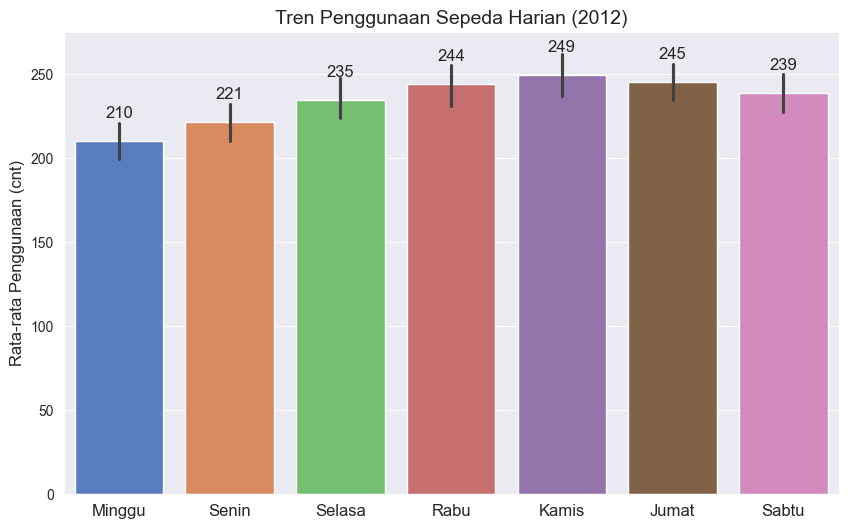

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weekday_day', y='cnt',
                 data=combined_df[combined_df['yr'] == 1], palette='muted')

days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.xticks(ticks=range(7), labels=days, fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 20),
                textcoords='offset points',
                fontsize=12)
plt.title('Tren Penggunaan Sepeda Harian (2012)', fontsize=14)
plt.xlabel(None)
plt.ylabel('Rata-rata Penggunaan (cnt)', fontsize=12)
plt.show()

**Insight:**
Barplot menunjukkan penggunaan harian di 2012 lebih tinggi pada hari kerja dibandingkan akhir pekan. Puncak terjadi pada hari Kamis. Hal ini bisa menambah peluang dengan menyarankan penambahan sepeda pada pertengahan minggu.


### Pertanyaan 2:  Musim mana penggunaan sepeda tertinggi di tahun 2011-2012?

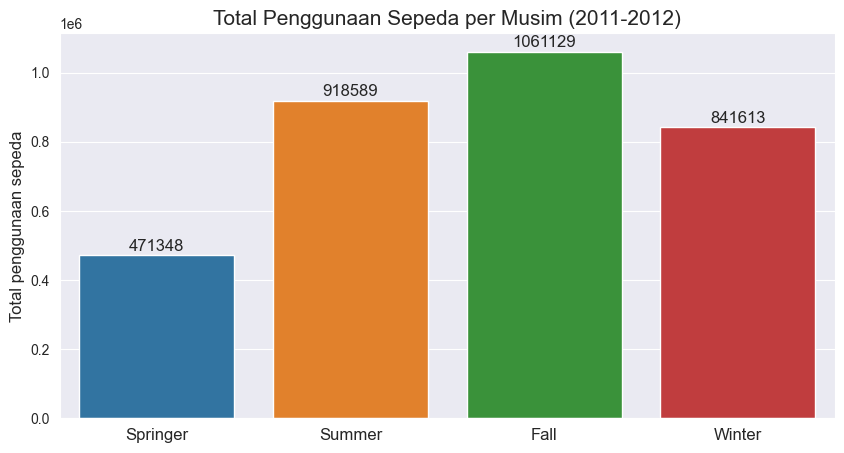

In [58]:
byseason_df = combined_df.groupby(by="season_day").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "total_usage"
}, inplace=True)

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Biru, Oranye, Hijau, Merah
plt.figure(figsize=(10, 5))
sns.barplot(
    y="total_usage",
    x="season_day",
    data=byseason_df.sort_values(by="total_usage", ascending=False),
    palette=colors
)

plt.title("Total Penggunaan Sepeda per Musim (2011-2012)", loc="center", fontsize=15)
plt.ylabel("Total penggunaan sepeda", fontsize=12)
plt.xlabel(None)
seasons = ['Springer', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=range(4), labels=seasons, fontsize=12)

for index, row in byseason_df.iterrows():
    plt.text(
        x=index,  # Position of the bar
        y=row["total_usage"] + 5000,  # Slightly above the bar
        s=f"{int(row['total_usage'])}",  # Value to display
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=12
    )
plt.show()

**Insight:**
Barplot menunjukkan bahwa musim Fall (3) memiliki total penggunaan tertinggi (1.06 juta), dibandingkan Summer (918 ribu), Winter (841 ribu), dan Springer (471 ribu). Ini menyarankan prioritas stok sepeda lebih banyak pada musim Fall.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda per jam di musim tertinggi 2012?

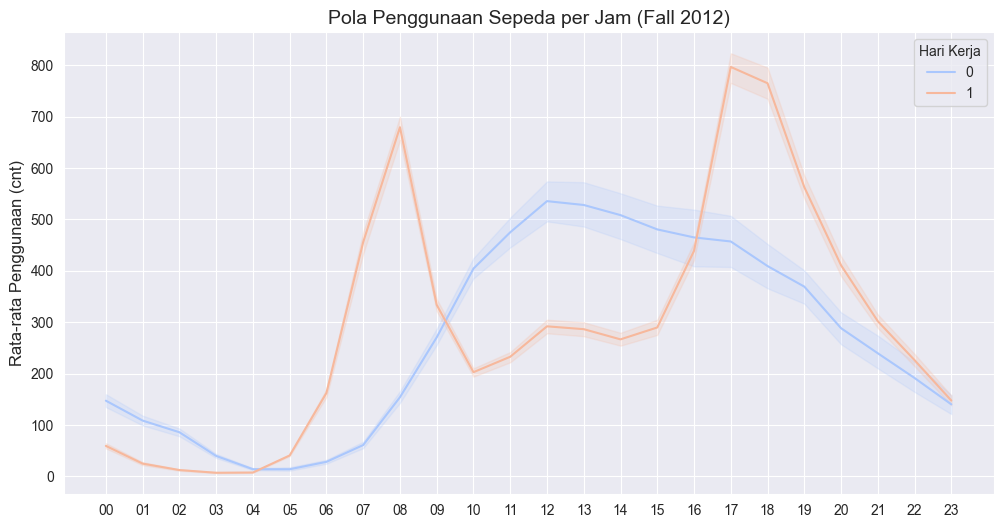

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday_day',
             data=combined_df[(combined_df['season_day'] == 3) & (combined_df['yr'] == 1)],
             palette='coolwarm')
plt.xticks(ticks=range(0, 24, 1),
           labels=[f'{i:02d}' for i in range(24)],
           fontsize=10)
plt.title('Pola Penggunaan Sepeda per Jam (Fall 2012)', fontsize=14)
plt.xlabel(None)
plt.ylabel('Rata-rata Penggunaan (cnt)', fontsize=12)
plt.legend(title='Hari Kerja', loc='upper right')
plt.show()

**Insight:**
Sebelumnya kita telah mengetahui bahwa musim dengan penggunaan tertinggi ada di musim Fall.

Lineplot menunjukkan pola Fall 2012: pada hari kerja, penggunaan melonjak di jam 8 dan 17-18, sedangkan hari non-kerja lebih merata (siang hari). Ini mengindikasikan jam sibuk pagi dan sore yang membutuhkan distribusi sepeda tambahan.

## Analisis Lanjutan (Opsional)

### Clustering Berdasarkan Musim dan Cuaca

Tujuan Analisis:
Teknik clustering ini bertujuan untuk mengelompokkan data penggunaan sepeda berdasarkan kombinasi musim dan cuaca. Dengan mengelompokkan data per jam berdasarkan musim (`season_day`) dan cuaca (`weathersit_day`).

Dengan melakukan clustering kita dapat:
- Mengidentifikasi pola penggunaan sepeda pada kondisi musim dan cuaca tertentu.
- Menemukan kondisi optimal (musim dan cuaca) yang menghasilkan penggunaan sepeda tertinggi.
- Membantu dalam alokasi sepeda dengan memprioritaskan kondisi musim dan cuaca yang paling banyak digunakan.

Metode Clustering:
- Membuat kolom baru (`cluster`) yang menggabungkan informasi musim (`season_day`) dan cuaca (`weathersit_day`) dalam format `S{season}-W{weather}`.
- Contoh: S1-W1 berarti musim semi (`season_day = 1`) dengan cuaca cerah (`weathersit_day = 1`).
- Mengelompokkan data berdasarkan cluster dan menghitung rata-rata penggunaan sepeda (cnt) untuk setiap kelompok.

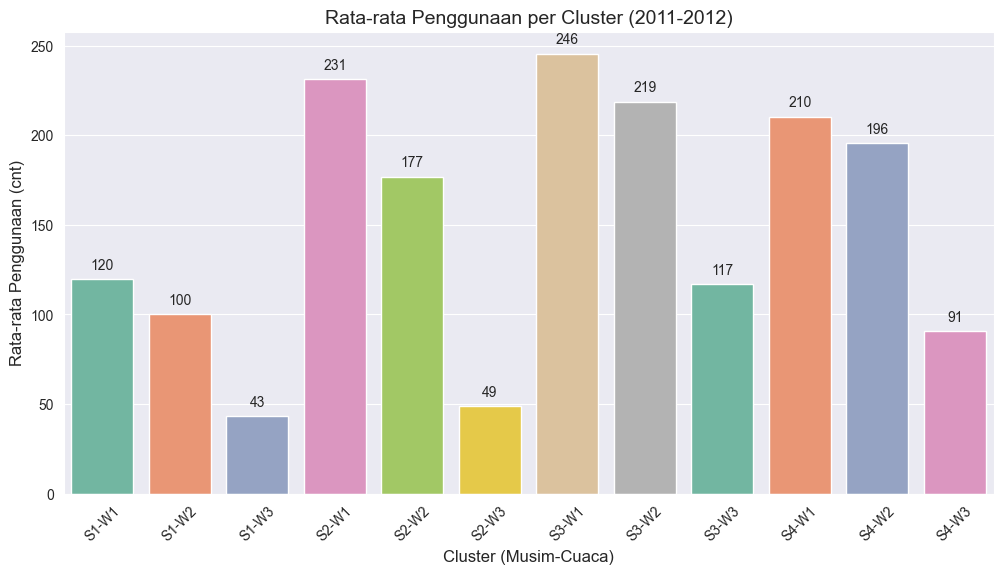

In [60]:
combined_df['cluster'] = combined_df.apply(
    lambda row: f"S{row['season_day']}-W{row['weathersit_day']}", axis=1
)
cluster_usage = combined_df.groupby('cluster')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='cluster', y='cnt', data=cluster_usage, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)
plt.title('Rata-rata Penggunaan per Cluster (2011-2012)', fontsize=14)
plt.xlabel('Cluster (Musim-Cuaca)', fontsize=12)
plt.ylabel('Rata-rata Penggunaan (cnt)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**
Cluster S3-W1 (Fall-Cerah) memiliki rata-rata penggunaan tertinggi, diikuti S2-W1 (Summer-Cerah). Ini menunjukkan cuaca cerah di musim Fall dan Summer adalah kondisi optimal untuk alokasi sepeda lebih banyak.

## Conclusion

- Conclution pertanyaan 1:
    Tren di 2012 menunjukkan penggunaan harian lebih tinggi pada hari kerja (puncak Kamis), mendukung strategi penjadwalan dengan tambahan sepeda pada pertengahan minggu.

- Conclution pertanyaan 2:
    Musim Fall (2011-2012) memiliki penggunaan tertinggi (1.06 juta), mengindikasikan kebutuhan stok sepeda lebih besar pada musim ini di tahun berikutnya.

- Conclution pertanyaan 3:
    Pola Fall 2012 mengungkap jam sibuk pada hari kerja (8 pagi, 17-18 sore), menyarankan distribusi sepeda tambahan pada jam tersebut untuk efisiensi layanan.


In [61]:
combined_df.to_csv("main_data.csv", index=False)